# MetPy Plots

#### Contains functionality for making a variety of meteorological plots:

### Classes:
`BarbPlot(*args, **kwargs)` Make plots of wind barbs on a map with traits to refine the look of plotted elements.

`ContourPlot(*args, **kwargs)` Make contour plots by defining specific traits.

`FilledContourPlot(*args, **kwargs)` Make color-filled contours plots by defining appropriate traits.

`Hodograph([ax, component_range])` Make a hodograph of wind data.

`ImagePlot(*args, **kwargs)` Make raster image using imshow for satellite or colored image.

`MapPanel(*args, **kwargs)` Set figure related elements for an individual panel.

`PanelContainer(*args, **kwargs)` Collects panels and set complete figure related settings (e.g., figsize).

`PlotScalar(*args, **kwargs)` Defines the common elements of 2D scalar plots for single scalar value fields.

`PlotVector(*args, **kwargs)` Defines common elements for 2D vector plots.

`Plots2D(*args, **kwargs)` The highest level class related to plotting 2D data.

`SkewT([fig, rotation, subplot, rect, aspect])` Make Skew-T log-P plots of data.

`StationPlot(ax, x, y[, fontsize, spacing, …])` Make a standard meteorological station plot.

`StationPlotLayout` make a layout to encapsulate plotting using StationPlot.






.


In [1]:
%matplotlib inline

import xarray as xr

import metpy.calc as calc
from metpy.plots import ContourPlot, ImagePlot, MapPanel, PanelContainer
from metpy.units import units

from datetime import datetime
#from netCDF4 import Dataset, date2index

## Example 1: Plotting a map of gridded data

All of the plotting functionality is built on top of Matplotlib.

Also, the map drawing features come from CartoPy (which was originally developed by the UK Met Office!)

Here we use ERA5 reanalysis over the US - a patriotic date in 2018:

In [2]:
epath = '/shared/land/ERA5/daily/conus/'
sfcfile = epath+'ea_oper_an+fc_daily_MJJAS_2018.nc4'
#sfcdata = Dataset(sfcfile,"r")

sfcx = xr.open_dataset(sfcfile)
dt = datetime(2018, 7, 4)

Create a contour plot of temperature

In [3]:
contour = ContourPlot()
contour.data = sfcx
contour.field = 't2m'
contour.time = dt
contour.linecolor = 'maroon'
contour.linewidth = 1
contour.contours = 8
contour.clabels = True

Create an image plot of dew point

In [4]:
# t2mu = sfcx.t2m.sel(time=dt) * units.kelvin
# d2mu = sfcx.d2m.sel(time=dt) * units.kelvin
# rh2m = calc.relative_humidity_from_dewpoint(t2mu, d2mu)

img = ImagePlot()
img.data = sfcx
img.time = dt
img.field = 'd2m'
img.colormap = 'summer'
#img.colorbar = 'True'

Plot the data on a map

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable


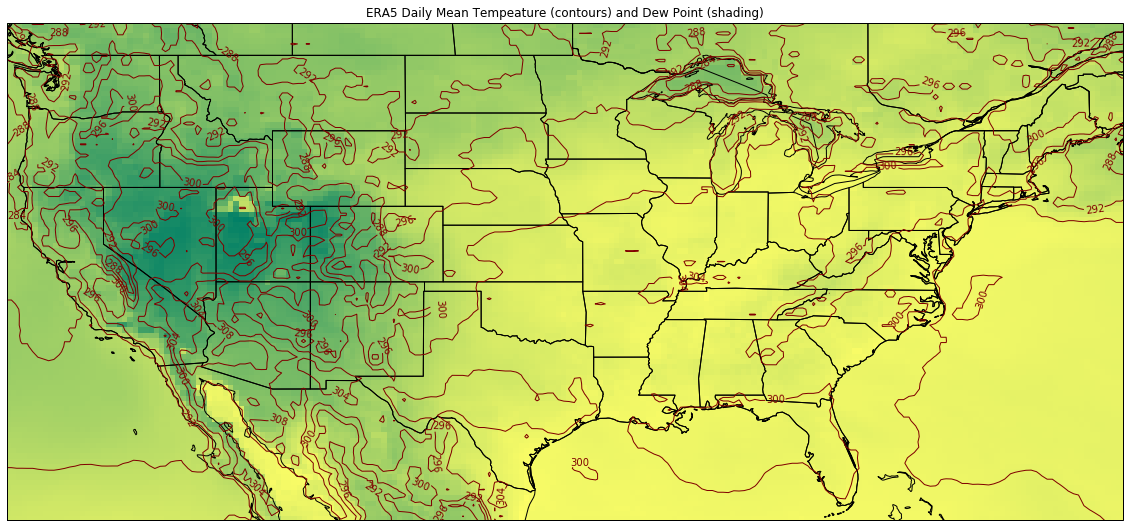

In [5]:
panel = MapPanel()
#panel.area = 'us'
panel.layout = (1, 1, 1)
panel.area = (-125.1, -66, 24.4, 50.7)
#panel.projection = 'mer'
panel.layers = ['coastline', 'borders', 'states', 'ocean', 'land']
panel.title = 'ERA5 Daily Mean Tempeature (contours) and Dew Point (shading)'
panel.plots = [contour, img]

pc = PanelContainer()
pc.size = (20, 15)
pc.panels = [panel]
pc.show()